In [1]:
# Importing Libraries

import nltk
import pandas as pd

In [3]:
#nltk.download_shell()
#download stopwords

In [86]:
#loading the dataset

df = pd.read_csv('D:\My ML Projects\Spam SMS Classification\SMSSpamCollection', sep='\t', names=['label', 'message'])

In [87]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
df.message[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
print(len(messages))

5574


In [94]:
for mess_no, message in enumerate(df.message[:10]):
    print(mess_no, message)
    print('\n')

0 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 Ok lar... Joking wif u oni...


2 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 U dun say so early hor... U c already then say...


4 Nah I don't think he goes to usf, he lives around here though


5 FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 Even my brother is not like to speak with me. They treat me like aids patent.


7 As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


9 Had you

In [95]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [96]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [97]:
df['length'] = df['message'].apply(len)

In [98]:
df.sort_values('length', ascending=False)

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
...,...,...,...
3376,ham,:),3
5357,ham,Ok,2
4498,ham,Ok,2
1925,ham,Ok,2


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

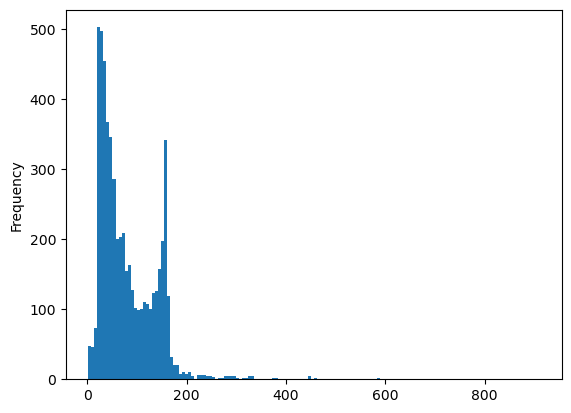

In [100]:
df.length.plot(kind= 'hist', bins=150)

In [101]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [102]:
df[df.length==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

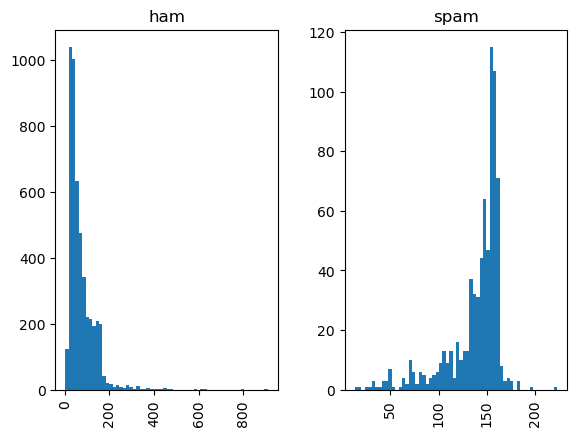

In [103]:
df.hist(column='length', by='label', bins=60)

In [142]:
import nltk

In [143]:
import re

In [144]:
from nltk.corpus import stopwords

In [145]:
from nltk.stem.porter import PorterStemmer

In [146]:
# Cleaning the messages
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):

  # Cleaning special character from the message
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.message[i])

  # Converting the entire message into lower case
  message = message.lower()

  # Tokenizing the review by words
  words = message.split()

  # Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  message = ' '.join(words)

  # Building a corpus of messages
  corpus.append(message)
  

In [147]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [148]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

In [150]:
import pickle

In [151]:
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [160]:
# Model Building

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [161]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB

In [162]:
classifier = MultinomialNB(alpha=0.3)

In [163]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix

In [165]:
predict = classifier.predict(X_test)

In [167]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))


[[1441   10]
 [  13  208]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1451
           1       0.95      0.94      0.95       221

    accuracy                           0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [168]:
# Creating a pickle file for the Multinomial Naive Bayes model

filename = 'spam-sms-mnb-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))